# Tensorflow Object Detection API
- Tensorflow Object Detection API는 TensorFlow를 이용해서 Object Detection 모델을 train하고 deploy하는 것을 쉽게 도와주는 오픈소스 프레임워크.
- https://github.com/tensorflow/models/tree/master/research/object_detection
- Tutorial: https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/

# Custom (Image) Data 구하기

# Custom (Image) Data Labeling

# 전단계
- 구글드라이브 연결
- raw_data의 데이터압축파일을 VM local에 압축 푼다.

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
# 압축 풀기
# unzip 명령어 이용: !unzip 압축파일 -d 압축풀디렉토리
!unzip -q /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/raw_data/american_sign_language_letters.zip -d images

replace images/test/T24_jpg.rf.068e7b2424eac996c86bb6d9c38e083d.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Tensorflow Object Detection 2 API 설치
1. clone 
    - `!git clone https://github.com/tensorflow/models.git`
1. PYTHONPATH 환경설정에 models/research 추가  
1. 필요 모듈 설치
    - `!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk`
    - `!pip install -qq Cython contextlib2 pillow lxml matplotlib pycocotools`
1. proto 파일 컴파일
    - models/research 경로로 이동
        - `%cd models/research`
    - `!protoc object_detection/protos/*.proto --python_out=.`
1. setup.py 를 이용해 필요한 모듈 추가 설치
    - setup.py를 현재 디렉토리로 카피
        - `!cp object_detection/packages/tf2/setup.py . `
    - 설치
        - `!python -m pip install . `
    - 설치 확인 - 아래 스크립트 실행시 오류 없이 실행되면 설치 잘 된 것임.
        - `!python object_detection/builders/model_builder_tf2_test.py`
1. 원래 디렉토리로 이동
    - `%cd ../..`        

In [74]:
# Tensorflow Object Detection API2 를 clone
!git clone https://github.com/tensorflow/models.git

fatal: destination path 'models' already exists and is not an empty directory.


In [75]:
# 환경설정 - PYTHONPATH = models/research
import os
os.environ['PYTHONPATH'] += ":/content/models/research"

In [76]:
# 추가 필요 모듈 설치
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk

In [77]:
!pip install -qq Cython contextlib2 pillow lxml matplotlib pycocotools

In [78]:
# proto 파일 컴파일
%cd /content/models/research

/content/models/research


In [79]:
!protoc object_detection/protos/*.proto --python_out=.

In [80]:
# setup.py 실행
# setup.py를 현재 디렉토리로 카피 - !cp 대상파일경로 카피경로
!cp object_detection/packages/tf2/setup.py .

In [81]:
# setup.py를 이용해 추가 패키지 설치
!python -m pip install .

Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1665976 sha256=6da42b9fea0e37dd4d4d9400f90148dded781e828e7afac74e5b545806b0a8df
  Stored in directory: /tmp/pip-ephem-wheel-cache-pu00qbuf/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [82]:
# 설치 확인
!python object_detection/builders/model_builder_tf2_test.py

Traceback (most recent call last):
  File "object_detection/builders/model_builder_tf2_test.py", line 25, in <module>
    from object_detection.builders import model_builder
  File "/content/models/research/object_detection/builders/model_builder.py", line 27, in <module>
    from object_detection.builders import image_resizer_builder
  File "/content/models/research/object_detection/builders/image_resizer_builder.py", line 19, in <module>
    from object_detection.core import preprocessor
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 967, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 677, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 857, in get_code
  File "<frozen importlib._bootstrap_external>", line 525, in _compile_bytecode
KeyboardInterrupt


In [83]:
# 작업 디렉토리 /content로 이동
%cd ../..
!pwd

/content
/content


# 경로 설정

In [84]:
# root 경로 (workspace)
BASE_PATH = "/content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace"
# utility 기능을 구현한 python script 파일들이 있는 디렉토리
SCRIPTS_PATH = "/content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/scripts"
# Tensorflow Object Detection API2 경로
TF_OD_API_PATH = "/content/models"
# image/annotation 파일들 경로
IMAGE_PATH = "/content/images"

# LabelMap 파일을 저장할 디렉토리 / 파일 경로
# label map 설정파일 = 분류할 class들을 정의한 파일
LABEL_MAP_PATH = os.path.join(BASE_PATH, 'labelmap')
LABEL_MAP_FILE_PATH = os.path.join(LABEL_MAP_PATH, 'label_map.pbtxt')

# TF Record 저장 경로
# dataset 관련 파일들은 google drive보다 local에 저장
TF_RECORD_PATH = "/content/tfrecord"
if not os.path.isdir(TF_RECORD_PATH):
    os.mkdir(TF_RECORD_PATH)

# custom dataset을 학습한 모델(모델, weight 파일)을 저장할 경로
MODEL_PATH = os.path.join(BASE_PATH, 'model')
CHECK_POINT_PATH = os.path.join(MODEL_PATH, 'checkpoint')   # weights(파라미터) 저장할 디렉토리
EXPORT_MODEL_PATH = os.path.join(MODEL_PATH, 'export_model')   # 학습된 모델(모델+weight)을 추출해 저장할 디렉토리
# pipeline.config 파일 = 모델구조, 학습에 필요한 정보, 평가 시 필요한 정보를 설정하는 파일.
PIPELINE_CONFIG_PATH = os.path.join(MODEL_PATH, 'pipeline.config')

# 전이학습에 사용할 다운받은 모델을 저장할 디렉토리
PRE_TRAINED_MODEL_PATH = os.path.join(BASE_PATH, 'pre_trained_model')

# Custom data 학습 시키기

## 다음 세가지 작업이 필요
<span style='font-weight:bold;font-size:1.3em'>1. Label Map 파일 생성</span>
- 분류 하고자 하는 object의 class와 그 class id 를 pbtxt text 파일로 작성
- `models\research\object_detection\data`

```
item {
  id: 1
  name: 'aeroplane'
}

item {
  id: 2
  name: 'bicycle'
}
...
```

<span style='font-weight:bold;font-size:1.3em'>2. pipeline.config</span>
- Model을 학습, 검증하기 위해 필요한 설정을 하는 파일
- `models\research\object_detection\samples\configs`

<span style='font-weight:bold;font-size:1.3em'>3. 학습/검증/테스트에 사용할 데이터셋을 TFRecord 로 구성</span>
- 주요 데이터셋을 TFRecord로 생성하는 코드
- `models\research\object_detection\dataset_tools`

# 설정파일 설정 및 데이터셋 준비

# Label Map 생성

In [85]:
names = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
# len(names), names
ids = range(1, 27)

In [86]:
# File IO를 이용해 label map 파일을 출력
with open(LABEL_MAP_FILE_PATH, 'wt') as fw:
    for id, name in zip(ids, names):
        fw.write('item {\n')
        fw.write(f'\tid:{id}\n')
        fw.write(f"\tname:'{name}'\n")
        fw.write('}\n')

# TFRecord 생성

In [87]:
# train set tfrecord 생성 명령어
f"!python {SCRIPTS_PATH}/generate_tfrecord.py -x {IMAGE_PATH}/train -l {LABEL_MAP_FILE_PATH} -o {TF_RECORD_PATH}/train.tfr"

'!python /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/scripts/generate_tfrecord.py -x /content/images/train -l /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/labelmap/label_map.pbtxt -o /content/tfrecord/train.tfr'

In [88]:
!python /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/scripts/generate_tfrecord.py -x /content/images/train -l /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/labelmap/label_map.pbtxt -o /content/tfrecord/train.tfr

In [89]:
# validation set 생성
f"!python {SCRIPTS_PATH}/generate_tfrecord.py -x {IMAGE_PATH}/valid -l {LABEL_MAP_FILE_PATH} -o {TF_RECORD_PATH}/valid.tfr"

'!python /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/scripts/generate_tfrecord.py -x /content/images/valid -l /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/labelmap/label_map.pbtxt -o /content/tfrecord/valid.tfr'

In [90]:
!python /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/scripts/generate_tfrecord.py -x /content/images/valid -l /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/labelmap/label_map.pbtxt -o /content/tfrecord/valid.tfr

Successfully created the TFRecord file: /content/tfrecord/valid.tfr


In [91]:
# test set 생성
f"!python {SCRIPTS_PATH}/generate_tfrecord.py -x {IMAGE_PATH}/test -l {LABEL_MAP_FILE_PATH} -o {TF_RECORD_PATH}/test.tfr"

'!python /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/scripts/generate_tfrecord.py -x /content/images/test -l /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/labelmap/label_map.pbtxt -o /content/tfrecord/test.tfr'

In [92]:
!python /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/scripts/generate_tfrecord.py -x /content/images/test -l /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/labelmap/label_map.pbtxt -o /content/tfrecord/test.tfr

Successfully created the TFRecord file: /content/tfrecord/test.tfr


In [93]:
# 생성된 tfrecord 파일을 google drive에 카피(백업)
f"!cp {TF_RECORD_PATH}/*.tfr {os.path.join(BASE_PATH, 'tfrecord')}"

'!cp /content/tfrecord/*.tfr /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/tfrecord'

In [94]:
!cp /content/tfrecord/*.tfr /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/tfrecord

# Pretrained Model Download
- Tensorflow object detection API는 MS COCO 2017 dataset으로 미리 학습시킨 다양한 Object Detection 모델을 제공한다.
- tf2 detection Model Zoo: https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md
- SSD MobileNet V2 FPNLite 320x320 다운로드
    - 성능은 떨어지지만 학습속도가 빠르다.

In [95]:
# 리눅스 명령어 wget url: url의 파일을 다운로드하는 리눅스 명령어
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

--2021-09-29 08:12:50--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.214.128, 2607:f8b0:4001:c05::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.214.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.1s    

2021-09-29 08:12:50 (134 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]



In [96]:
# 다운받은 모델을 google drive workspace pretrained model로 옮기고 압축 풀기
# !mv 원본경로 타겟경로
f"!mv ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz {PRE_TRAINED_MODEL_PATH}"

'!mv ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/pre_trained_model'

In [97]:
!mv ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/pre_trained_model

In [98]:
# 압축 풀기
# tar.gz : !tar -zxvf 압축파일경로 -C 압축풀경로
f"!tar -zxvf {PRE_TRAINED_MODEL_PATH}/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz -C {PRE_TRAINED_MODEL_PATH}"

'!tar -zxvf /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/pre_trained_model/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz -C /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/pre_trained_model'

In [99]:
!tar -zxvf /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/pre_trained_model/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz -C /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/pre_trained_model

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# Pipeline.config 설정 변경

## pipeline.config  파일 개요
- Model을 학습, 검증하기 위해 필요한 설정을 하는 파일
- 구조
    - https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/configuring_jobs.md
    - **model**
        - 사용하는 모델에 대한 설정
        - class 개수
        - 입력이미지 size
        - anchor 설정
    - **train_config**
        - Train(학습)관련 설정
        - batch_size
            - 사용하는 GPU의 메모리 크기에 맞게 조절한다.
        - image augmentation관련 설정 등
        - optimizer관련 설정
        - 학습에 사용할 weight 파일의 경로
    - **train_input_reader**
        - labelmap 파일 경로
        - train tfrecord 파일 경로
    - **eval_config**
        - evaluation(평가)을 위해 사용하는 metric 설정
    - **eval_input_reader**
        - labelmap 파일 경로
        - evaluation tfreord 파일 경로
        

## Pretrain model의 pipeline.config 파일 카피
- pretrained 모델의 압축을 풀면 pipeline.config 파일이 있다.
- workspace\model 로 copy 한다.

In [100]:
PRE_TRAINED_MODEL_PATH = os.path.join(PRE_TRAINED_MODEL_PATH, "ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8")

In [101]:
f"!cp {os.path.join(PRE_TRAINED_MODEL_PATH, 'pipeline.config')} {PIPELINE_CONFIG_PATH}"

'!cp /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/pre_trained_model/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/model/pipeline.config'

In [102]:
!cp /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/pre_trained_model/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/model/pipeline.config

## pipeline.config 설정 변경
- pipeline.config 내용 변경은 파일을 **직접 변경**할 수도 있고 **코드상에서 변경**할 수도 있다.

### 필수 변경사항
-  class개수 변경
-  train 배치 사이즈 변경 - gpu 메모리 사양에 맞게 변경한다.
-  pretrained model 경로 설정
-  pretrained model이 어떤 종류의 모델인지 설정
-  train 관련 변경
    -  labelmap 파일 경로 설정
    -  train 용 tfrecord 파일 경로 지정
-  evaluation 관련 변경
    -  labelmap 파일 경로 설정
    -  evaluation 용 tfrecord 파일 경로 지정

In [103]:
# Tensorflow Object Detection API에서 제공하는 Library를 이용해 pipeline.config 변환 작업
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [104]:
# pipeline.config 파일을 읽어서 확인
conf = config_util.get_configs_from_pipeline_file(PIPELINE_CONFIG_PATH)   # 받은 경로의 pipeline.config파일의 설정을 딕셔너리로 읽어온다.
print(type(conf))
conf

<class 'dict'>


{'eval_config': metrics_set: "coco_detection_metrics"
 use_moving_averages: false,
 'eval_input_config': label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 },
 'eval_input_configs': [label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 }
 ],
 'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.9969999790191

In [105]:
# 수정 작업
# 빈 pipeline.config 템플릿을 생성
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()   # pipeline.config의 속성들을 수정하는 기능을 제공
print(type(pipeline_config))
print(pipeline_config)

<class 'object_detection.protos.pipeline_pb2.TrainEvalPipelineConfig'>



In [106]:
# pipeline.config의 내용을 text로 읽어서 TrainEvalPipelineConfig(템플릿-틀)에 넣는다.
with tf.io.gfile.GFile(PIPELINE_CONFIG_PATH, 'r') as fr:  # open()의 Tensorflow 버전
    proto_str = fr.read()   # text로 읽기
    text_format.Merge(proto_str, pipeline_config)   # 읽은 설정 text를 속성단위로 나눠서 TrainEvalPipelineConfig에 넣어준다.

In [107]:
# 각 항목(속성)들을 변환
pipeline_config.model.ssd.num_classes = 26   # 검출할 class 개수
pipeline_config.train_config.batch_size = 8
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(PRE_TRAINED_MODEL_PATH, 'checkpoint', 'ckpt-0')   # pretrained model의 weiht(전이학습에서 초기 weight - 확장자 뺀 파일명 주기)
pipeline_config.train_config.fine_tune_checkpoint_type = 'detection'    # pretrained model이 어떤 작업을 위한 학습한 모델인지 지정 (object detection=detection)

# train dataset 관련 설정
# label map 경로
pipeline_config.train_input_reader.label_map_path = LABEL_MAP_FILE_PATH
# tfrecord 경로
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(TF_RECORD_PATH, 'train.tfr')]
# evaluation dataset 관련 설정
# label map 경로
pipeline_config.eval_input_reader[0].label_map_path = LABEL_MAP_FILE_PATH
# tfrecord 경로
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(TF_RECORD_PATH, 'valid.tfr')]

In [108]:
print(pipeline_config)

model {
  ssd {
    num_classes: 26
    image_resizer {
      fixed_shape_resizer {
        height: 320
        width: 320
      }
    }
    feature_extractor {
      type: "ssd_mobilenet_v2_fpn_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 3.9999998989515007e-05
          }
        }
        initializer {
          random_normal_initializer {
            mean: 0.0
            stddev: 0.009999999776482582
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.996999979019165
          scale: true
          epsilon: 0.0010000000474974513
        }
      }
      use_depthwise: true
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
        additional_layer_depth: 128
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0


In [109]:
# 변경된 내용을 pipeline.config 파일에 덮어쓰기
# TrainEvalPipelineConfig를 text(str)으로 변환
config_text = text_format.MessageToString(pipeline_config)
# 파일로 저장(출력)
with open(PIPELINE_CONFIG_PATH, 'w') as fw:
    fw.write(config_text)

# Model 학습
- 다음 명령어를 실행한다.
- 시간이 오래 걸리므로 terminal에서 실행한다.
```
python models/research/object_detection/model_main_tf2.py --model_dir=workspace/model/checkpoint --pipeline_config_path=workspace/model/pipeline.config --num_train_steps=3000
```

## 옵션
- model_dir: 학습한 모델의 checkpoint 파일을 저장할 경로. (1000 step당 저장한다.)
- pipeline_config_path: pipeline.config 파일 경로
- num_train_steps: 학습할 step 수

In [110]:
f"!python models/research/object_detection/model_main_tf2.py --model_dir {CHECK_POINT_PATH} --pipeline_config_path {PIPELINE_CONFIG_PATH} --num_train_steps=3000"

'!python models/research/object_detection/model_main_tf2.py --model_dir /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/model/checkpoint --pipeline_config_path /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/model/pipeline.config --num_train_steps=3000'

In [111]:
# !python models/research/object_detection/model_main_tf2.py --model_dir /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/model/checkpoint --pipeline_config_path /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/model/pipeline.config --num_train_steps=3000

# 학습한 모델 추출(export - 모델과 가중치 함께 저장)
- `models/research/object_detection/exporter_main_v2.py` 사용
- 옵션
    - `exporter_main_v2.py --helpshort || exporter_main_v2.py --helpfull`
    - input_type : input node type
        - image_tensor, encoded_image_string_tensor
    - trained_checkpoint_dir: 학습된 checkpoint 파일이 저장된 경로(folder/directory)
    - pipeline_config_path: pipeline.config 파일의 경로 (파일명 포함) - 모델 구조를 알려주기 위함
    - output_directory: export된 모델을 저장할 경로.
- 추출된 디렉토리 구조
```bash
output_dir
├─ checkpoint/
├─ saved_model/
└─ pipeline.config
```
    - checkpoint: custom data 학습한 checkpoint 파일들을 이 디렉토리로 복사한다.
    - save_model: pipeline.config 설정에 맞춰 생성된 model
    - pipeline.config: pipeline.config 설정파일

In [112]:
%pwd

'/content'

In [113]:
f"!python models/research/object_detection/exporter_main_v2.py --input_type image_tensor --trained_checkpoint_dir {CHECK_POINT_PATH} --pipeline_config_path {PIPELINE_CONFIG_PATH} --output_directory {EXPORT_MODEL_PATH}"

'!python models/research/object_detection/exporter_main_v2.py --input_type image_tensor --trained_checkpoint_dir /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/model/checkpoint --pipeline_config_path /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/model/pipeline.config --output_directory /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/model/export_model'

In [114]:
!python models/research/object_detection/exporter_main_v2.py --input_type image_tensor --trained_checkpoint_dir /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/model/checkpoint --pipeline_config_path /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/model/pipeline.config --output_directory /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/model/export_model

2021-09-29 08:12:55.216832: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-29 08:12:55.249619: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-29 08:12:55.250930: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-29 08:12:55.273522: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-29 08:12:55.274420: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

# Inference(추론)

### 사용 함수,메소드
-  ### tf.convert_to_tensor(array_like, dtype)
    - array_like 를 Tensorflow Tensor 객체로 변환
    - `tf.convert_to_tensor([[1,2],[3,4]])`
- ### detection_model.preprocess(image 4차원 <del>ndarray</del> Tensor)
    - 전달받은 이미지를 model의 input shape(320,320)에 맞게 resizing 한다.
    - 반환값: (resize된 image Tensor, 이미지의 shape) 을 tuple로 반환
- ### detection_model.predict(image tensor, image_shape tensor)
    - 추론/detection 메소드
    - 이미지와 image shape을 받아서 detection한 결과를 딕셔너리로 반환한다.
    - **반환 dictionary key**
        - **preprocessed_inputs**:  입력 이미지 Tensor. preprocess()로 처리된 이미지. 
        - **feature_maps**: List. feature map 들을 반환
        - **anchors**: 2D Tensor. normalize 된 anchor box들의 좌표를 반환. 2-D float tensor: \[num_anchors, 4\]
        - **final_anchors**: 3D Tensor. batch 당 anchors. (anchors에 batch가 포함된 것). \[batch_size, num_anchors, 4\]
        - **box_encodings**: 3D float tensor. predict한 box들의 normalize된 좌표. \[batch_size, num_anchors,box_code_dimension\]
        - **class_predictions_with_background**: 3D Tensor. 클래스 확률을 반환.(logit). \[batch_size, num_anchors, num_classes+1]\
            - background 확률을 포함해서 num_classes+1개가 된다. (index 0: background)
            
- ### detection_model.postprocess(prediction_dict, shape)
    - predict()가 예측한 결과에서 **Non-Maxinum Suppression**을 실행해서 최종 Detection 결과를 반환한다.
        - predict()는 anchor별로 예측결과를 모아서 주고 post-process는 최종 결과를 추출해서 반환.
    - **반환 dictionary key**
        - **num_detections**: Detect한 개수 (bounding box 개수)
        - **detection_boxes**: [batch, max_detections, 4]. 후처리한 detection box
        - **detection_scores**: [batch, max_detections]. post-processed detection box들의 detection score들 (detection score는 box안에 물체가 있을 확률값 - confidence score).
        - **detection_classes**: [batch, max_detections] tensor with classes for post-processed detection classes.
        - **raw_detection_boxes**:[batch, total_detections, 4] Non-Max Suppression 하기 전의 감지된 raw detection box들 (12800개 정도...)
        - **raw_detection_scores**: [batch, total_detections, num_classes_with_background]. raw detection box들의 class별 점수
        - **detection_multiclass_scores**: [batch, max_detections, num_classes_with_background] post-processed이후 남은 bounding box 들의 class별 점수(확률). LabelMap의 class에 background가 추가되어 계산된다.
        - **detection_anchor_indices**: [batch, max_detections] post-processed 이후 나은 anchor box의 index들.

In [115]:
# checkpoints.zip 압축풀기
f"!unzip -q {os.path.join(MODEL_PATH, 'checkpoint_backup', 'checkpoints.zip')} -d {os.path.join(MODEL_PATH, 'checkpoint_backup')}"

'!unzip -q /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/model/checkpoint_backup/checkpoints.zip -d /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/model/checkpoint_backup'

In [116]:
!unzip -q /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/model/checkpoint_backup/checkpoints.zip -d /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/model/checkpoint_backup

replace /content/drive/MyDrive/ColabNotebooks/object_detection_src/sign_language_letters/workspace/model/checkpoint_backup/checkpoint/ckpt-50.index? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [117]:
# 추론할 이미지를 test set으로부터 복사
!cp /content/images/test/A22_jpg.rf.f02ad8558ce1c88213b4f83c0bc66bc8.jpg ./a.jpg

In [118]:
!cp /content/images/test/C22_jpg.rf.e54cbbfdd4ea0670eb4e1c507de4a8a2.jpg ./c.jpg
!cp /content/images/test/F17_jpg.rf.6097db79e0385af55b85ad5fa03cdc55.jpg ./f.jpg
!cp /content/images/test/G3_jpg.rf.e723dcdc277f3432e4eb7003b6e5a587.jpg ./g.jpg

### 모델 생성
- 저장된 weight를 이용해서 모델 구성

In [119]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

from object_detection.utils import label_map_util   # Label map을 읽어오는 함수
from object_detection.utils import visualization_utils as viz_utils   # 이미지에 추론 결과 bbox를 그려주는 함수
from object_detection.utils import config_util   # pipeline.config 관련 작업하는 함수
from object_detection.builders import model_builder  # 모델(network) 생성 함수

In [120]:
# pipeline.config에서 모델(네트워크) 구조 조회 후 모델 생성
# pipeline.config 파일 로딩
config = config_util.get_configs_from_pipeline_file(PIPELINE_CONFIG_PATH)   # 딕셔너리로 반환
# 모델 생성 - 설정 중 model 설정을 주입해서 생성 (초기 파라미터)
detection_model = model_builder.build(model_config=config['model'], is_training=False)

# 생성된 모델에 저장된 weights(파라미터)를 주입
ckpt_path = os.path.join(MODEL_PATH, 'checkpoint_backup', 'checkpoint', 'ckpt-51')
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)    # checkpoint 객체 생성
ckpt.restore(ckpt_path).expect_partial()   # 해당 경로에 있는 ckpt를 모델에 넣기

# 새로운 이미지 Detection

In [121]:
def detect_function(img):
    """
    Tensor 타입의 추론할 image를 받아서 추론결과를 반환하는 메소드.
    1. preprocessing: resize, 정규화
    2. 추론(predict)
    3. postprocessing: 추론 결과 bounding box에서 non-maximum suppression 처리
    [parameter]
        img: Tensor - 추론할 이미지
    [return value]
        tuple: (후처리 전 추론 결과, 후처리 후 결과)
    """
    # preprocessing
    img, shapes = detection_model.preprocess(img)   # (전처리된img Tensor, shape) 튜플 반환
    print('shapes:', shapes)
    # 추론
    pred = detection_model.predict(img, shapes)
    # postprocessing
    result = detection_model.postprocess(pred, shapes)

    return pred, result   # (후처리 전 추론 결과, 후처리 후 결과)

In [122]:
# 추론
# image 읽어오기
test_file = 'a.jpg'
img_np = cv2.cvtColor(cv2.imread(test_file), cv2.COLOR_BGR2RGB)   # cv2.imread(): BGR모드 --> RGB로 바꿔줘야 함
# type(img_np)  numpy.ndarray, dtype=uint8
# img_np.shape   -> 3차원인데 배치축 필요해서 4차원으로 바꿔줘야 함
# ndarray -> Tensor
input_tensor = tf.convert_to_tensor(img_np[np.newaxis, ...], dtype=tf.float32)
# print(img_np.dtype, input_tensor.shape, input_tensor.dtype)

In [123]:
# 추론
pred, result = detect_function(input_tensor)

shapes: tf.Tensor([[320 320   3]], shape=(1, 3), dtype=int32)


### result 확인

In [124]:
type(pred), type(result)

(dict, dict)

In [125]:
result.keys()

dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections', 'raw_detection_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_anchor_indices'])

In [126]:
# 분류 결과 class label (총 class는 A ~ Z 26개 0~25)
result['detection_classes']
# shape=(1, 100) ==> (batch개수, 추론결과개수)

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 0., 15., 24.,  9., 22., 13.,  6.,  6., 19., 12.,  8., 18., 15.,
         1., 15., 25., 21., 22.,  7., 14.,  4.,  8., 23., 16., 10., 17.,
        15.,  7., 16.,  5., 22., 14., 25., 16., 14.,  8., 11., 23.,  5.,
        13.,  0.,  6., 22., 24., 22.,  7., 12.,  8., 18.,  9., 25., 10.,
        23., 22., 11., 21., 21., 24.,  6., 22.,  3., 13.,  2.,  9.,  4.,
         4.,  7.,  4.,  4., 25., 19.,  9., 11., 15., 11.,  6., 11.,  7.,
         4., 11., 20., 23., 10.,  1.,  4., 23., 20.,  7., 23., 25., 16.,
         5., 17.,  7.,  8., 13.,  6., 15., 23.,  6.]], dtype=float32)>

In [127]:
# 각 bbox의 confidence score(box 안에 물체가 있을 확률)
# 100개의 bbox 결과는 confidence score가 높은 순서부터 내림차순으로 정렬되어 출력
# 모든 추론 결과들은 이 순서에 따라 정렬됨 (같은 index는 같은 bbox에 대한 추론 결관)
result['detection_scores']

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[0.99882704, 0.04132277, 0.04127693, 0.03856854, 0.0333676 ,
        0.0273268 , 0.02488796, 0.02342383, 0.0214373 , 0.02126563,
        0.01738562, 0.01715071, 0.016902  , 0.01597475, 0.01405788,
        0.01329976, 0.01291277, 0.01245026, 0.01088046, 0.01066701,
        0.01027229, 0.00959054, 0.00916235, 0.0090005 , 0.00898874,
        0.00891284, 0.00875278, 0.00869359, 0.00856588, 0.00854579,
        0.00842985, 0.00834129, 0.00759439, 0.00757002, 0.00754813,
        0.00748431, 0.00746663, 0.00745493, 0.00743138, 0.00735877,
        0.00717015, 0.00703093, 0.00690919, 0.00689454, 0.00674969,
        0.00674034, 0.00673096, 0.00653816, 0.00647155, 0.00628291,
        0.00627357, 0.00609608, 0.00602701, 0.00599112, 0.0059888 ,
        0.00586225, 0.00583078, 0.00568603, 0.00567735, 0.00564732,
        0.00557743, 0.00554952, 0.00554132, 0.00546506, 0.00544499,
        0.00542077, 0.00539602, 0.0053946 , 0.00537077, 0.00536678

In [128]:
# bbox의 정규화된 좌표 (xmin, ymin, xmax, ymax) 
result['detection_boxes']
# shape=(1, 100, 4) = (batch개수, 100개bbox, 각 좌표)

<tf.Tensor: shape=(1, 100, 4), dtype=float32, numpy=
array([[[2.33933240e-01, 1.93980277e-01, 7.15939283e-01, 8.11026394e-01],
        [6.25555575e-01, 1.13251805e-02, 7.60060966e-01, 9.47119892e-02],
        [2.38303587e-01, 1.96787298e-01, 7.16777027e-01, 8.10919106e-01],
        [0.00000000e+00, 5.99063814e-01, 3.40253651e-01, 8.37284029e-01],
        [2.34506980e-01, 1.93589717e-01, 7.14470088e-01, 8.14250350e-01],
        [2.34506980e-01, 1.93589717e-01, 7.14470088e-01, 8.14250350e-01],
        [2.38303587e-01, 1.96787298e-01, 7.16777027e-01, 8.10919106e-01],
        [0.00000000e+00, 3.14431548e-01, 9.60528925e-02, 5.20017087e-01],
        [2.35118896e-01, 1.99765563e-01, 7.20414758e-01, 8.09190273e-01],
        [2.35544160e-01, 1.96241677e-01, 7.11981773e-01, 8.09607208e-01],
        [2.38303587e-01, 1.96787298e-01, 7.16777027e-01, 8.10919106e-01],
        [2.34506980e-01, 1.93589717e-01, 7.14470088e-01, 8.14250350e-01],
        [7.15667367e-01, 6.25978053e-01, 1.00000000e+00, 1.

In [129]:
# 각 bbox의 class별 확률 (0번 index는 배경, 1~26 = A~Z)
# detection_classes에서는 배경 없음
result['detection_multiclass_scores']
# shape=(1, 100, 27) = 여기서 총 class는 배경(0) 포함 27개

<tf.Tensor: shape=(1, 100, 27), dtype=float32, numpy=
array([[[9.70160909e-05, 9.98827040e-01, 4.78730910e-03, ...,
         2.02959409e-08, 7.16418261e-03, 8.86084279e-04],
        [8.23272494e-05, 1.18236931e-03, 3.60871170e-04, ...,
         1.02870073e-03, 1.69268285e-03, 8.92238313e-05],
        [7.71276187e-03, 9.56782222e-01, 1.45542715e-02, ...,
         5.77397404e-05, 4.12769280e-02, 1.15989633e-02],
        ...,
        [8.52649828e-05, 9.47848428e-04, 2.26443444e-04, ...,
         6.69864821e-04, 4.79377923e-04, 1.28635904e-04],
        [8.86472757e-04, 7.04130798e-04, 1.03541033e-03, ...,
         4.28638794e-03, 1.35815132e-03, 7.54652661e-04],
        [2.92211142e-03, 7.37142283e-04, 3.09587573e-04, ...,
         9.92937596e-04, 5.37608343e-04, 7.55576184e-04]]], dtype=float32)>

In [130]:
# 추출된 100개의 bbox에서 confidence score가 특정 threshold 이상인 box만 선택해서 원하는 작업을 진행
CS_TH = 0.5
for cs in result['detection_scores'][0]:
    if cs >= CS_TH:
        print(cs)

tf.Tensor(0.99882704, shape=(), dtype=float32)


In [131]:
result['raw_detection_scores'].shape   # 후처리 전 결과 -> 후처리: confidence score가 높은 순서로 100개 추출(pipeline.config에서 개수 설정 가능-max_total_detections)

TensorShape([1, 12804, 27])

In [134]:
result['num_detections'].shape   # 후처리 detection bbox의 개수
result['num_detections'].numpy()   # Tensor -> ndarray

array([100.], dtype=float32)

## result 결과를 이용해서 원본 image에 bbox 그리기
- visualization_utils 함수를 이용


In [135]:
# visualization_utils() 사용 위해 추론 결과를 Tensor에서 ndarray로 변환 필요(Tensor.numpy())
num_detections = int(result.pop('num_detections'))
print(num_detections)
# num_detections는 1차원 배열이라서 뺐다가 다시 넣어줌

100


In [136]:
result.keys()

dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'raw_detection_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_anchor_indices'])

In [137]:
a = {'a':10, 'b':20}
a.items()

dict_items([('a', 10), ('b', 20)])

In [138]:
# key는 그대로 두고 value만 ndarray로
detection_dict = {key:value[0, :num_detections].numpy() for key, value in result.items()}
detection_dict['num_detections'] = num_detections   # 새로 생성한 dict에 num_detections 추가

In [139]:
result['detection_classes'].dtype

tf.float32

In [140]:
# 추론한 label을 float32에서 int로 변환
detection_dict['detection_classes'] = detection_dict['detection_classes'].astype(np.int64)

In [141]:
# LabelMap을 읽기
category_index = label_map_util.create_category_index_from_labelmap(LABEL_MAP_FILE_PATH)
print(type(category_index))

<class 'dict'>


In [142]:
category_index

{1: {'id': 1, 'name': 'A'},
 2: {'id': 2, 'name': 'B'},
 3: {'id': 3, 'name': 'C'},
 4: {'id': 4, 'name': 'D'},
 5: {'id': 5, 'name': 'E'},
 6: {'id': 6, 'name': 'F'},
 7: {'id': 7, 'name': 'G'},
 8: {'id': 8, 'name': 'H'},
 9: {'id': 9, 'name': 'I'},
 10: {'id': 10, 'name': 'J'},
 11: {'id': 11, 'name': 'K'},
 12: {'id': 12, 'name': 'L'},
 13: {'id': 13, 'name': 'M'},
 14: {'id': 14, 'name': 'N'},
 15: {'id': 15, 'name': 'O'},
 16: {'id': 16, 'name': 'P'},
 17: {'id': 17, 'name': 'Q'},
 18: {'id': 18, 'name': 'R'},
 19: {'id': 19, 'name': 'S'},
 20: {'id': 20, 'name': 'T'},
 21: {'id': 21, 'name': 'U'},
 22: {'id': 22, 'name': 'V'},
 23: {'id': 23, 'name': 'W'},
 24: {'id': 24, 'name': 'X'},
 25: {'id': 25, 'name': 'Y'},
 26: {'id': 26, 'name': 'Z'}}

In [143]:
MIN_CONFIDENCE_THRESHOLD = 0.5   # confidence score가 0.5 이상인 것만 bbox 처리
img_np_copy = img_np.copy()
img = viz_utils.visualize_boxes_and_labels_on_image_array(
    img_np_copy,   # bbox 그릴 이미지
    detection_dict['detection_boxes'],   # bbox 좌표
    detection_dict['detection_classes'] + 1,   # bbox 내부 object label (추론한 label과 labelmap의 id 맞추기 위해 +1)
    detection_dict['detection_scores'],   # bbox confidence score
    category_index,   # label map dictionary
    use_normalized_coordinates=True,   # 추론한 bbox 좌표가 정규화됐는지 여부
    max_boxes_to_draw=10,   # 최대 몇 개의 bbox를 그릴지 지정(기본 20개)
    min_score_thresh=MIN_CONFIDENCE_THRESHOLD
    )
# 원본 이미지 ndarray에 bbox와 label 시각화한 ndarray 반환해줌

In [148]:
%matplotlib inline

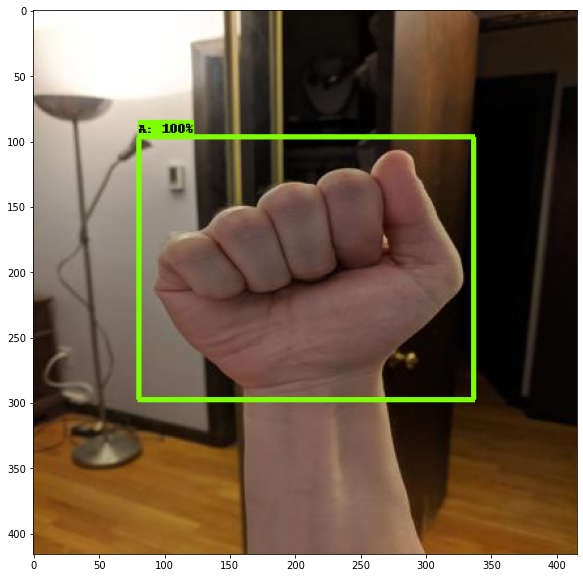

In [151]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.savefig('result_a.jpg')
plt.show()